## Loading the Dataset

In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [2]:
##reading dataset
df = pd.read_csv('/content/Reviews.csv', quoting=3, error_bad_lines=False)

print(df.shape)
df.head()

(13345, 10)


Skipping line 4: expected 10 fields, saw 14
Skipping line 6: expected 10 fields, saw 11
Skipping line 7: expected 10 fields, saw 18
Skipping line 8: expected 10 fields, saw 12
Skipping line 9: expected 10 fields, saw 11
Skipping line 12: expected 10 fields, saw 17
Skipping line 13: expected 10 fields, saw 12
Skipping line 14: expected 10 fields, saw 11
Skipping line 17: expected 10 fields, saw 11
Skipping line 20: expected 10 fields, saw 21
Skipping line 22: expected 10 fields, saw 11
Skipping line 23: expected 10 fields, saw 14
Skipping line 26: expected 10 fields, saw 13
Skipping line 27: expected 10 fields, saw 12
Skipping line 28: expected 10 fields, saw 11
Skipping line 30: expected 10 fields, saw 12
Skipping line 31: expected 10 fields, saw 17
Skipping line 32: expected 10 fields, saw 12
Skipping line 33: expected 10 fields, saw 11
Skipping line 34: expected 10 fields, saw 19
Skipping line 35: expected 10 fields, saw 12
Skipping line 36: expected 10 fields, saw 19
Skipping line 3

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Data Preparation

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
### add some columns for upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",-1.0
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,-1.0


assigning different different labels to helpful% according to its value

In [7]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.25      ,
        0.83333333,  0.66666667,  0.33333333,  0.5       ,  0.875     ,
        0.26315789,  0.53846154,  0.6       ,  0.75      ,  0.2       ,
        0.125     ,  0.57142857,  0.85714286,  0.9       ,  0.91666667,
        0.84615385,  0.3       ,  0.88888889,  0.78571429,  0.625     ,
        0.94117647,  0.92307692,  0.16666667,  0.71428571,  0.14285714,
        0.81818182,  0.09090909,  0.96969697,  0.18181818,  0.28571429,
        0.80645161,  0.4375    ,  0.47058824,  0.7       ,  0.72727273,
        0.27272727,  0.26666667,  0.4       ,  0.42857143,  0.36363636,
        0.9137931 ,  0.82857143,  0.90909091,  0.96428571,  0.11111111,
        0.86666667,  0.24      ,  0.95238095,  0.09375   ,  0.68      ,
        0.08333333,  0.12121212,  0.92156863,  0.94736842,  0.77777778,
        0.88235294,  0.05555556,  0.06666667,  0.07407407,  0.375     ,
        0.55555556,  0.89655172,  0.04545455,  0.93650794,  0.65

In [8]:
pd.cut(df['Helpful %'] , bins = [-1.0, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0        80-100%
1            NaN
2        80-100%
3        80-100%
4            NaN
          ...   
13340    80-100%
13341    80-100%
13342        NaN
13343        NaN
13344    80-100%
Name: Helpful %, Length: 13345, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [9]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",-1.0,NaN
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,-1.0,NaN


In [11]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                               
1     Empty     196        196     196          196                   196   
      0-20%      58         58      58           58                    58   
      20-40%    109        109     109          109                   109   
      40-60%    158        158     158          158                   158   
      60-80%    122        122     122          121                   122   
      80-100%   252        252     252          252                   252   
2     Empty      93         93      93           93                    93   
      0-20%      16         16      16           16                    16   
      20-40%     23         23      23           23                    23   
      40-60%     43         43      43           43                    43   
      60-80%     18         18      18           18                    18   
      80-100%   126        126     126          126                   126   
3     Empty      99         99      99           99                    99   
      0-20%      15         15      15           15                    15   
      20-40%     33         33      33           33                    33   
      40-60%     31         31      31           31                    31   
      60-80%     46         46      46           46                    46   
      80-100%   154        154     154          154                   154   
4     Empty     102        102     102          102                   102   
      0-20%       2          2       2            2                     2   
      20-40%     17         17      17           17                    17   
      40-60%     52         52      52           52                    52   
      60-80%     37         37      37           37                    37   
      80-100%   424        424     424          424                   424   
5     Empty     301        301     301          301                   301   
      0-20%      13         13      13           13                    13   
      20-40%     56         56      56           56                    56   
      40-60%    270        270     270          270                   270   
      60-80%    245        245     245          245                   245   
      80-100%  2975       2975    2975         2975                  2975   

               HelpfulnessDenominator  Time  Summary  Text  Helpful %  
Score %upvote                                                          
1     Empty                       196   196      196   196        196  
      0-20%                        58    58       58    58         58  
      20-40%                      109   109      109   109        109  
      40-60%                      158   158      158   158        158  
      60-80%                      122   122      122   122        122  
      80-100%                     252   252      252   252        252  
2     Empty                        93    93       93    93         93  
      0-20%                        16    16       16    16         16  
      20-40%                       23    23       23    23         23  
      40-60%                       43    43       43    43         43  
      60-80%                       18    18       18    18         18  
      80-100%                     126   126      126   126        126  
3     Empty                        99    99       99    99         99  
      0-20%                        15    15       15    15         15  
      20-40%                       33    33       33    33         33  
      40-60%                       31    31       31    31         31  
      60-80%                       46    46       46    46         46  
      80-100%                     154   154      154   154        154  
4     Empty                       102   102      102   102        102  
      0-20%                         2   

#### considering only Id Column, as I have to count Total Upvotes for different different categories

In [12]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote      
1     Empty     196
      0-20%      58
      20-40%    109
      40-60%    158
      60-80%    122
      80-100%   252
2     Empty      93
      0-20%      16
      20-40%     23
      40-60%     43
      60-80%     18
      80-100%   126
3     Empty      99
      0-20%      15
      20-40%     33
      40-60%     31
      60-80%     46
      80-100%   154
4     Empty     102
      0-20%       2
      20-40%     17
      40-60%     52
      60-80%     37
      80-100%   424
5     Empty     301
      0-20%      13
      20-40%     56
      40-60%    270
      60-80%    245
      80-100%  2975

In [13]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,196
1,1,0-20%,58
2,1,20-40%,109
3,1,40-60%,158
4,1,60-80%,122
5,1,80-100%,252
6,2,Empty,93
7,2,0-20%,16
8,2,20-40%,23
9,2,40-60%,43


#### create Pivot Table for better conclusion

In [14]:
df_s.pivot(index='%upvote',columns='Score')

Id                     
Score      1    2    3    4     5
%upvote                          
Empty    196   93   99  102   301
0-20%     58   16   15    2    13
20-40%   109   23   33   17    56
40-60%   158   43   31   52   270
60-80%   122   18   46   37   245
80-100%  252  126  154  424  2975

#### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

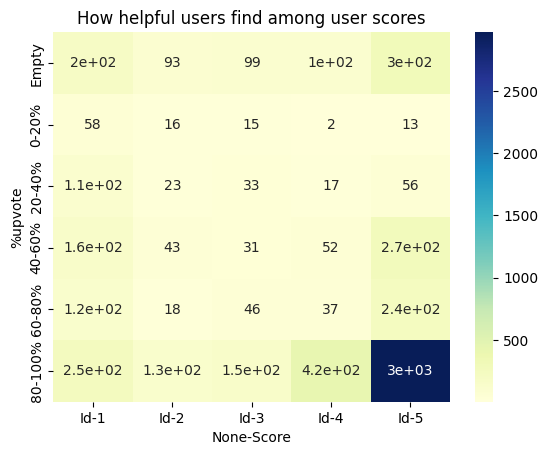

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [16]:
df.shape

(13345, 12)

In [17]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",-1.0,NaN
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,-1.0,NaN


In [18]:
df['Score'].unique()

array([5, 1, 2, 4, 3])

In [19]:
df = df.dropna()

In [20]:
df.shape

(6085, 12)

In [21]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

#### Score prediction

In [22]:
X

0        I have bought several of the Vitality canned d...
2        If you are looking for the secret ingredient i...
3        Right now I'm mostly just sprouting this so my...
5        good flavor! these came securely packed... the...
6        The Strawberry Twizzlers are my guilty pleasur...
                               ...                        
13332    I had this send over to Germany for my sister ...
13337    My fave is the white chocolate raspberry but a...
13339    I received my shipment came on time and I rece...
13340    This food is great quality and my cats love it...
13341    Top notch quality. I used it in making fondant...
Name: Text, Length: 5707, dtype: object

### convert your text into vectors using NLP

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [24]:
##takes almost 2 mins to execute
X_c = c.fit_transform(X)

In [25]:
print('features: {}'.format(X_c.shape[1]))

features: 10125


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 4280


In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [28]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.8934828311142257


#### fetch Top 20 Positive & Top 20 negative words

In [29]:
w = c.get_feature_names_out()
w

array(['00', '00pm', '01', ..., 'zucchini', 'zuke', 'zyto'], dtype=object)

In [30]:
coef = ml.coef_.tolist()[0]
coef

[0.21259623981672968,
 0.0018857423454285956,
 -0.2730068323353629,
 0.0,
 0.0062898017913254394,
 0.0,
 0.0,
 -0.14813957523927668,
 -0.6521019847622237,
 -1.0392821915053825,
 -0.018773188019465623,
 0.02025391361253545,
 0.004752423873552412,
 0.00011659776269312252,
 0.011110171244192226,
 0.0031476283447299126,
 -0.10341901576064215,
 -0.49400972586199915,
 0.21753777225550297,
 0.02617451659150306,
 -0.4038728505593567,
 0.09231010252342049,
 -0.26663845760592125,
 -0.08489578199958643,
 0.18930245873396612,
 -0.1289810996535944,
 -0.4363738867437437,
 -0.17552400278646432,
 -0.06775583958876565,
 0.00011659776269312252,
 -0.05443491935145913,
 -0.12163203375544766,
 0.08052574459143345,
 0.0025595425774962905,
 0.0,
 -0.0559979450054039,
 0.05321385287701812,
 0.013370825053753636,
 0.031365316362158675,
 -0.14404712838148864,
 -0.13256232241053106,
 0.04629118035384702,
 0.0,
 -0.14123130588427324,
 -0.09657732886600497,
 0.11088129151777115,
 -0.5235683759177776,
 0.0,
 0.0076

In [31]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,0.212596
1,00pm,0.001886
2,01,-0.273007
3,02,0.000000
4,03510,0.006290
...,...,...
10120,zon,0.050652
10121,zoology,-0.011217
10122,zucchini,0.002869
10123,zuke,0.240019


In [32]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
5302,loves,1.957289
4019,great,1.864757
9943,wonderful,1.836763
984,best,1.764586
6496,perfect,1.706635
...,...,...
9982,worst,-1.662289
4381,horrible,-1.693317
2749,disappointed,-1.744389
9792,weak,-1.893770


In [33]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
     Word  Coefficient
    loves     1.957289
    great     1.864757
wonderful     1.836763
     best     1.764586
  perfect     1.706635
     easy     1.667476
     love     1.657403
     glad     1.471158
delicious     1.450020
excellent     1.352027
     nice     1.323037
    loved     1.292409
    thank     1.283858
 favorite     1.248056
   stores     1.124130
     bulk     1.093989
     good     1.079421
  awesome     1.058630
    enjoy     1.051092
     home     1.009631


-Top 20 negative-
          Word  Coefficient
disappointment    -1.075853
        refund    -1.084718
          look    -1.088695
         sorry    -1.094962
    ingredient    -1.158814
         broke    -1.160162
           bad    -1.175512
          rest    -1.206472
         threw    -1.208369
           air    -1.224090
         waste    -1.225672
        return    -1.281394
    purchasing    -1.316791
         nasty    -1.340304
           rip    -1.483513
         worst    -1.662289
   

#### lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [34]:
### create a function

def text_fit(X, y, nlp_model,ml_model,coef_show=1):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))

    if coef_show == 1:
        w = nlp_model.get_feature_names_out()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')
        print(coeff_df.tail(20).to_string(index=False))
    return ml, nlp_model, X_test, y_test

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [36]:
model, nlp_model, X_test, y_test = text_fit(X, y, c, LogisticRegression())

features: 10125
 train records: 4280
 test records: 1427
Model Accuracy: 0.8878766643307638


-Top 20 positive-
     Word  Coefficient
     best     2.291701
     easy     1.776246
    great     1.765658
    loves     1.735055
delicious     1.713969
  perfect     1.679658
wonderful     1.666632
    loved     1.501236
     love     1.500297
     glad     1.488078
 favorite     1.411963
excellent     1.370568
     nice     1.312057
    enjoy     1.305187
     home     1.223102
  exactly     1.201067
     year     1.164148
     bulk     1.063182
    right     1.060482
   packed     1.000876


-Top 20 negative-
        Word  Coefficient
       badly    -1.104693
     plastic    -1.115730
       money    -1.132981
     thought    -1.158862
       china    -1.160747
  ingredient    -1.172910
       threw    -1.200706
       maybe    -1.213513
       nasty    -1.223860
  purchasing    -1.263767
      refund    -1.269338
       waste    -1.279065
       stale    -1.340444
    vinegary    -1.35

### Lets define a predict function

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
from collections import Counter
Counter(y)

Counter({1: 4494, 0: 1213})

In [40]:
predict(X,y,c,lr)

features: 10125
 train records: 4280
 test records: 1427
[[ 198   36]
 [ 109 1084]]
0.8983882270497547


In [41]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
predict(X, y, c, randomclassifier)

features: 10125
 train records: 4280
 test records: 1427
[[ 125    5]
 [ 187 1110]]
0.8654519971969166


In [42]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
predict(X, y, c, naive)

features: 10125
 train records: 4280
 test records: 1427
[[ 198   54]
 [ 130 1045]]
0.8710581639803784


In [43]:
from sklearn import svm
svm_clf = svm.SVC()
predict(X, y, c, svm_clf)

features: 10125
 train records: 4280
 test records: 1427
[[ 126    4]
 [ 177 1120]]
0.8731604765241766


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
predict(X, y, c, knn)

features: 10125
 train records: 4280
 test records: 1427
[[  65   65]
 [ 232 1065]]
0.7918710581639804


In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict2(X, y, nlp_model,ml_model):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    os = RandomOverSampler()
    X_train_res, y_train_res = os.fit_resample(X_train, y_train)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    print(Counter(y_train))
    print(Counter(y_train_res))
    ml =ml_model.fit(X_train_res, y_train_res)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [46]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
predict2(X, y, c, randomclassifier)

features: 10125
 train records: 4280
 test records: 1427
Counter({1: 3347, 0: 933})
Counter({1: 3347, 0: 3347})
[[ 173   32]
 [ 107 1115]]
0.9025928521373511


#### Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [47]:
from sklearn.dummy import DummyClassifier

In [48]:
### calling function for dummy classifier
text_fit(X, y, c, DummyClassifier(),0)

features: 10125
 train records: 4280
 test records: 1427
Model Accuracy: 0.7904695164681149


(DummyClassifier(),
 CountVectorizer(stop_words='english'),
 <1427x10125 sparse matrix of type '<class 'numpy.int64'>'
 	with 24738 stored elements in Compressed Sparse Row format>,
 4774     1
 9676     1
 13329    1
 11108    1
 1759     1
         ..
 3445     1
 13101    1
 10668    1
 4260     1
 9433     0
 Name: Score, Length: 1427, dtype: int64)

#### Logistic regression model on TFIDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 10125
 train records: 4280
 test records: 1427
Model Accuracy: 0.8661527680448493


-Top 20 positive-
     Word  Coefficient
    great     5.504072
     love     4.621137
     best     4.016228
     good     3.384528
delicious     2.800259
  perfect     2.393185
    loves     2.354643
     easy     2.182089
     nice     2.172564
 favorite     2.100808
excellent     2.087358
wonderful     2.044477
    loved     1.903777
     make     1.819657
     glad     1.547151
    enjoy     1.422866
    right     1.410643
    years     1.394993
   highly     1.378924
     home     1.361636


-Top 20 negative-
        Word  Coefficient
         box    -1.469731
        know    -1.481997
       taste    -1.487030
     plastic    -1.623750
       nasty    -1.632191
       threw    -1.782290
         buy    -1.822999
       worst    -1.910144
       stale    -1.979506
      return    -2.004376
       china    -2.022202
        away    -2.055561
       waste    -2.125513
         did    -2.29

(LogisticRegression(),
 TfidfVectorizer(stop_words='english'),
 <1427x10125 sparse matrix of type '<class 'numpy.float64'>'
 	with 24823 stored elements in Compressed Sparse Row format>,
 10478    1
 6886     1
 7525     1
 9322     1
 9408     1
         ..
 5482     0
 2728     1
 4119     1
 8747     1
 11205    1
 Name: Score, Length: 1427, dtype: int64)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 10125
 train records: 4280
 test records: 1427
[[  99    6]
 [ 193 1129]]
0.8605466012613875


In [51]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
predict(X, y, tfidf, randomclassifier)

features: 10125
 train records: 4280
 test records: 1427
[[ 110    8]
 [ 203 1106]]
0.8521373510861948


In [52]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
predict(X, y, tfidf, naive)

features: 10125
 train records: 4280
 test records: 1427
[[  11    0]
 [ 291 1125]]
0.7960756832515767


In [53]:
from sklearn import svm
svm_clf = svm.SVC()
predict(X, y, tfidf, svm_clf)

features: 10125
 train records: 4280
 test records: 1427
[[ 123    4]
 [ 196 1104]]
0.8598458304134547


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
predict(X, y, tfidf, knn)

features: 10125
 train records: 4280
 test records: 1427
[[ 100   93]
 [ 200 1034]]
0.7946741415557113


In [55]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
predict2(X, y, tfidf, randomclassifier)

features: 10125
 train records: 4280
 test records: 1427
Counter({1: 3370, 0: 910})
Counter({1: 3370, 0: 3370})
[[ 197   45]
 [ 106 1079]]
0.8941836019621584


#### Upvote prediction

    We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [56]:
data = df[df['Score'] == 5]

In [57]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [58]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(3289, 12)

In [59]:
X = data2['Text']

In [60]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [61]:
print(y.value_counts())

1.0    3220
0.0      69
Name: %upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
    Let's resample the data to get balanced data:

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tf=TfidfVectorizer()

In [64]:
X_c=tf.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [66]:
y_test.value_counts()

1.0    965
0.0     22
Name: %upvote, dtype: int64


Random oversampling involves randomly duplicating examples in the minority class, whereas random undersampling involves randomly deleting examples from the majority class.


Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

In [67]:
os =  RandomOverSampler()

In [68]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [69]:
X_train_res.shape,y_train_res.shape

((6440, 7622), (6440,))

In [70]:
from collections import Counter

In [71]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 3220, 0.0: 69})
Resampled dataset shape Counter({1.0: 3220, 0.0: 3220})


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_class=LogisticRegression()

In [74]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [75]:
grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'penalty': ['l1', 'l2']}

In [76]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [77]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [78]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 22   0]
 [  0 965]]
1.0
